# Model 2: 
Fitting SR Matrix plus a secondary SR matrix with a different gamma and added weights by question type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tesser import cython_sr
from tesser import cython_fit
from tesser import util
import importlib

In [2]:
data_dir= "/mnt/c/Users/rodv2/Dropbox/tesser_successor/Data"
tdir = "/home/work-machine/Preston_Lab/tesser_successor/Data/Transitional_Matrices"

In [3]:
induct_all = util.load_induct(data_dir)
struct_all = util.load_struct(data_dir)
n_states = 21
subj_list = util.subj_list()

In [4]:
induct_all.QuestType.unique()

array(['Prim', 'Bound2', 'Bound1'], dtype=object)

In [5]:
# subj_filter = f'SubjNum == {100}'
# induct_all = induct_all.query(subj_filter)
# struct_all = struct_all.query(subj_filter)

In [7]:
fixed = {"gamma2": 0.75}
var_names = ['gamma',  'alpha', 'tau', 'w_prim' ,'w_bound1', 'w_bound2']
var_bounds = {'gamma': [0, 1], 'alpha': [0, 1], 'tau': [0, 10],
              'w_prim' : [0, 1], 'w_bound1' : [0, 1], 'w_bound2' : [0, 1]}
results = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds, split =True,
                               n_states=n_states, verbose=False, model_type='multiple gamma', model=[], split_list =["w"])

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 107...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating

In [8]:
results=results.set_index('subject')
results.head()

,gamma2,gamma,alpha,tau,w_prim,w_bound1,w_bound2,log_like
subject,,,,,,,,
100,0.75,1.0,1.000000,2.439556,0.041082,0.380037,1.000000,-25.722733
101,0.75,0.0,1.000000,0.223416,0.848235,0.000000,1.000000,-25.787964
102,0.75,1.0,0.014077,0.096697,0.000000,1.000000,1.000000,-20.818470
103,0.75,0.0,0.783275,0.154976,0.623969,1.000000,0.866425,-24.118692
104,0.75,0.0,1.000000,0.558111,1.000000,1.000000,0.750693,-27.112071


In [22]:
importlib.reload(cython_fit)

<module 'tesser.cython_fit' from '/home/work-machine/Preston_Lab/tesser_successor/tesser/cython_fit.py'>

array([[<AxesSubplot:title={'center':'gamma2'}>,
        <AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'w_prim'}>,
        <AxesSubplot:title={'center':'w_bound1'}>],
       [<AxesSubplot:title={'center':'w_bound2'}>,
        <AxesSubplot:title={'center':'log_like'}>, <AxesSubplot:>]],
      dtype=object)

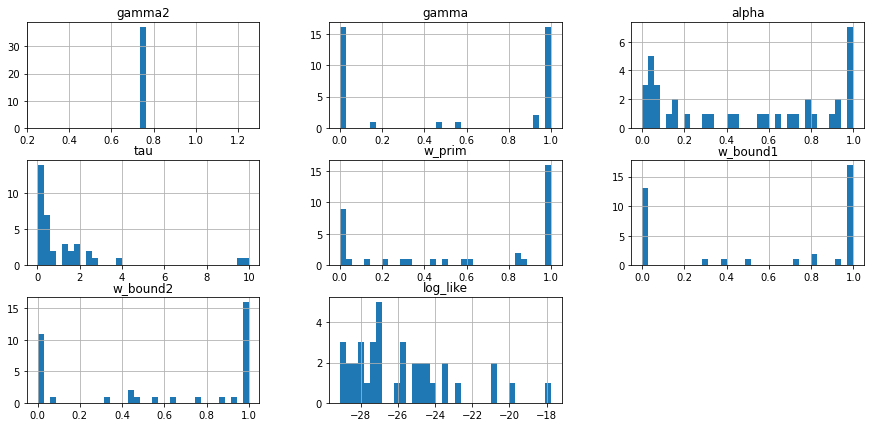

In [24]:
# cython_fit.plot_by_question(struct_all, induct_all, results, split =True, n_states= 21, model =[[]],
#                             model_type= 'multiple gamma',
#                             fig_name='Multiple gamma matrix by question'),
results.hist(bins=35,figsize= (15,7))

In [34]:
results.to_csv("./Data/results/gamma_fixed.csv")

In [25]:
fixed = {}
var_names = ['gamma', "gamma2", 'alpha', 'tau', 'w_prim' ,'w_bound1', 'w_bound2']
var_bounds = {'gamma': [0, 1],"gamma2": [0.5,1], 'alpha': [0, 1], 'tau': [0, 10],
              'w_prim' : [0, 1], 'w_bound1' : [0, 1], 'w_bound2' : [0, 1]}
results_2 = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds, split =True,
                               n_states=n_states, verbose=False, model_type='multiple gamma', model=[], split_list =["w"])

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 107...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating

In [31]:
# results_2=results_2.set_index('subject')
results_2.head()

,gamma,gamma2,alpha,tau,w_prim,w_bound1,w_bound2,log_like
subject,,,,,,,,
100,0.58778,1.000000,1.000000,2.219801,0.960526,0.650772,0.000000,-25.671969
101,0.00000,1.000000,0.983236,0.036474,0.995264,0.621873,0.998148,-21.087584
102,1.00000,0.500000,0.013110,0.081044,0.000000,1.000000,1.000000,-20.714134
103,0.00000,0.912859,0.804161,0.124269,0.747295,1.000000,1.000000,-23.423158
104,0.00000,0.737928,1.000000,0.558112,1.000000,1.000000,0.735867,-27.111977


array([[<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'gamma2'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'w_prim'}>,
        <AxesSubplot:title={'center':'w_bound1'}>],
       [<AxesSubplot:title={'center':'w_bound2'}>,
        <AxesSubplot:title={'center':'log_like'}>, <AxesSubplot:>]],
      dtype=object)

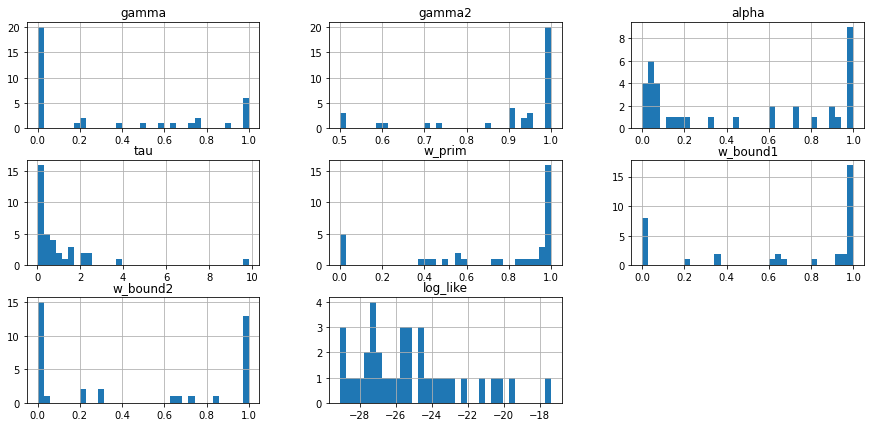

In [36]:
results_2.hist(bins=35,figsize= (15,7))

In [35]:
results_2.to_csv("./Data/results/gamma_free.csv")

In [5]:
fixed = {"gamma2": 0.0}
var_names = ['gamma',  'alpha', 'tau', 'w_prim' ,'w_bound1', 'w_bound2']
var_bounds = {'gamma': [0, 1], 'alpha': [0, 1], 'tau': [0, 10],
              'w_prim' : [0, 1], 'w_bound1' : [0, 1], 'w_bound2' : [0, 1]}
results_3 = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds, split =True,
                               n_states=n_states, verbose=False, model_type='multiple gamma', model=[], split_list =["w"])

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 107...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating

In [6]:
results_3=results_3.set_index('subject')
results_3.head()

,gamma2,gamma,alpha,tau,w_prim,w_bound1,w_bound2,log_like
subject,,,,,,,,
100,0.0,1.000000,1.000000,2.557134,0.054802,0.420629,1.000000,-25.912443
101,0.0,1.000000,0.983236,0.036472,0.004736,0.378151,0.001851,-21.087584
102,0.0,1.000000,0.010554,0.058579,0.000000,1.000000,1.000000,-20.660921
103,0.0,0.912852,0.804158,0.124271,0.252735,0.000000,0.000000,-23.423158
104,0.0,0.000000,1.000000,0.558111,0.358364,0.664810,0.729835,-27.130966


In [7]:
results_3.to_csv("./Data/results/gamma_zero.csv")